# Project Name: Rain Prediction using ML models and PyCaret

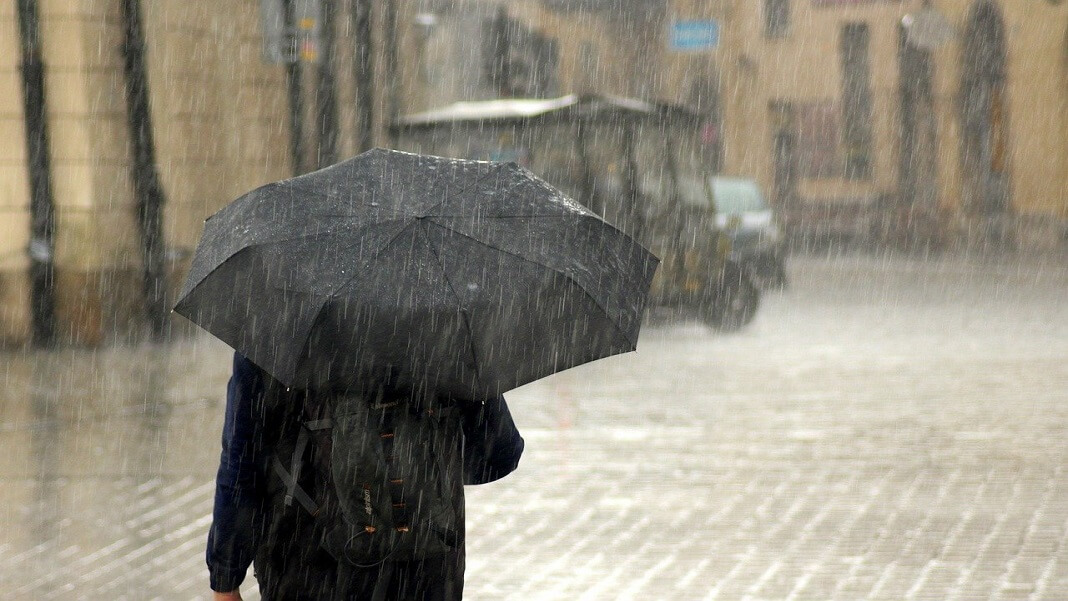

### In this project we will create a web app which will predict wether it will rain tomorrow or not.


### We will be using different ML models and then Auto ML Library i.e. PyCaret in this project

### Time Line of the Project :
- Data Analysis
- Handling Missing Values
- Handling Categorical Varibales
- Feature Engineering
- Model Building using ML 
- Model Building using Auto ML i.e PyCaret

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Reading our data

In [ ]:
df=  pd.read_csv("/content/drive/MyDrive/weatherAUS.csv")
pd.set_option("display.max_columns", None)

In [ ]:
df

### Let us devide our variables into different categories

In [ ]:
df.nunique()

#### Discrete Variable are countable in finit amount of time while numerical variable are to much in number to count

In [ ]:
num_var = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_var = [feature for feature in num_var if len(df[feature].unique()) <= 25]
cont_var = [feature for feature in num_var if feature not in discrete_var]
categ_var = [feature for feature in df.columns if feature not in num_var]

In [ ]:
df[categ_var]

### Handling Missing Values

In [ ]:
df.isnull().sum()

In [ ]:
df.isnull().sum()*100/len(df)

In [ ]:
def find_var_type(var):
    

    if var in discrete_var:
        print("{} is a Numerical Variable, Discrete in nature".format(var))
    elif var in cont_var :
        print("{} is a Numerical Variable, Continuous in nature".format(var))
    else :
        print("{} is a Categorical Variable".format(var))

In [ ]:
find_var_type('Cloud3pm')

### We will do Ramdom Sample Imputation for the our variables which are having the most percentage of Nul Vlaues

In [ ]:
def RandomSampleImputation(df, feature):
    df[feature]=df[feature]
    random_sample=df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
    random_sample.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature]=random_sample

In [ ]:
RandomSampleImputation(df, "Cloud9am")
RandomSampleImputation(df, "Cloud3pm")
RandomSampleImputation(df, "Evaporation")
RandomSampleImputation(df, "Sunshine")

In [ ]:
df.isnull().sum()*100/len(df)

In [ ]:
find_var_type('RainToday')

### Then we will replace the null values of all the continuous feature which are having less number of null values

In [ ]:
def MeanImputation(df, feature):
    df[feature]= df[feature]
    mean= df[feature].mean()
    df[feature]= df[feature].fillna(mean)

In [ ]:
MeanImputation(df,'Pressure3pm')

In [ ]:
MeanImputation(df, 'Pressure9am')
MeanImputation(df, 'MinTemp')
MeanImputation(df, 'MaxTemp')
MeanImputation(df, 'Rainfall')
MeanImputation(df, 'WindGustSpeed')
MeanImputation(df, 'WindSpeed9am')
MeanImputation(df, 'WindSpeed3pm')
MeanImputation(df, 'Pressure9am')
MeanImputation(df, 'Humidity9am')
MeanImputation(df, 'Humidity3pm')
MeanImputation(df, 'Temp3pm')
MeanImputation(df, 'Temp9am')

In [ ]:
df.isnull().sum()*100/len(df)

### Now we are left with the categotical varibales only, for these variables we will replace null values later in the Label Encoding part.

### Plotting a HeatMap

In [ ]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

### Analysis for Continuous variables

In [ ]:
for feature in cont_var:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

In [ ]:
for feature in cont_var:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

### One Hot Encoding

In [ ]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

### Lable Encoding

In [ ]:
for feature in categ_var:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

In [ ]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [ ]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [ ]:
df.isnull().sum()*100/len(df)

In [ ]:
df.head()

### We have removed all the null values and handeled with categorical data

### Now we will do the Label Encoding for our Location according to our Target variable

In [ ]:
df_loc = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()

In [ ]:
df_loc.head()

In [ ]:
df_loc[1].sort_values(ascending = False)

In [ ]:
df_loc[1].sort_values(ascending = False).index

In [ ]:
len(df_loc[1].sort_values(ascending = False).index)

In [ ]:
mapped_location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(mapped_location)

### Mapping Data

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day

In [ ]:
df.head()

In [ ]:
sns.countplot(df["RainTomorrow"])

In [ ]:
df= df.drop(['Date'],axis=1)

In [ ]:
df.head()

### Plotting Q-Q Plot

In [ ]:
import scipy.stats as stats
import pylab

In [ ]:
def plot_curve(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()

In [ ]:
for i in cont_var:
    plot_curve(df, i)

### Splitting the data

In [ ]:
x = df.drop(["RainTomorrow"], axis=1)
y = df["RainTomorrow"]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale=StandardScaler()

In [ ]:
scale.fit(x)

In [ ]:
X= scale.transform(x)

In [ ]:
x.columns

In [ ]:
X=pd.DataFrame(X,columns=x.columns)

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 0)

## Model Building using ML Models.
### We will use the following Algorithms:
- RandomForestClassifier
- GaussianNB
- KNeighborsClassifier
- XGB Classifier

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ranfor= RandomForestClassifier()

In [ ]:
ranfor.fit(X_train,y_train)

In [ ]:
ypred= ranfor.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,ypred))
print(accuracy_score(y_test,ypred))
print(classification_report(y_test,ypred))

In [ ]:
metrics.plot_roc_curve(ranfor, X_test, y_test)
metrics.roc_auc_score(y_test, ypred, average=None) 

## Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb= GaussianNB()

In [ ]:
gnb.fit(X_train,y_train)

In [ ]:
ypred2= gnb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,ypred2))
print(accuracy_score(y_test,ypred2))
print(classification_report(y_test,ypred2))

In [ ]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, ypred2, average=None) 

## K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
ypred3= knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,ypred3))
print(accuracy_score(y_test,ypred3))
print(classification_report(y_test,ypred3))

In [ ]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, ypred3, average=None) 

## XGB Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb= XGBClassifier()

In [ ]:
xgb.fit(X_train,y_train)

In [ ]:
ypred4= xgb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,ypred4))
print(accuracy_score(y_test,ypred4))
print(classification_report(y_test,ypred4))

In [ ]:
metrics.plot_roc_curve(xgb, X_test, y_test)
metrics.roc_auc_score(y_test, ypred4, average=None) 

### We will save the best performing model i.e. XGB Classsifier model in our pickle file

In [ ]:
import pickle

In [ ]:
file = open('rain_XGBnew_model.pkl', 'wb')

In [ ]:
pickle.dump(xgb, file)

In [ ]:
model = pickle.load(open("rain_XGBnew_model.pkl", "rb"))

# Using Auto ML

##**PyCaret Library**

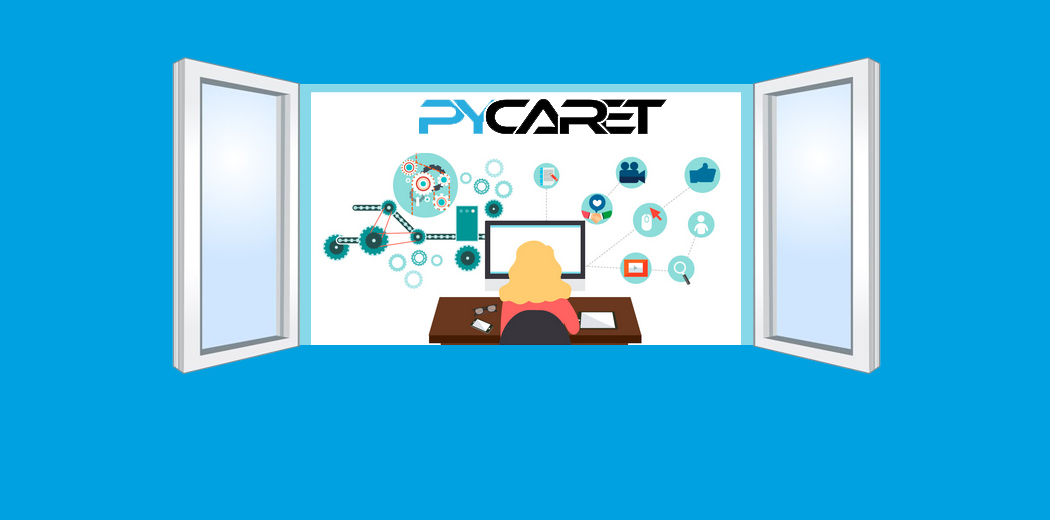

### PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment.

### Installing PyCaret

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
model= setup(data= df, target= 'RainTomorrow')

In [ ]:
compare_models()

In [ ]:
lightgbm= create_model('lightgbm')

In [ ]:
pred_holdout = predict_model(lightgbm,data= X_test)

In [ ]:
pred_holdout